In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### Among the rest of the info in the table above, it is clear that there are no NaNs

#### Standardising:

In [3]:
cols = [col_name.lower().replace(' ', '_') for col_name in data.columns]
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [4]:
data.columns = cols
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
data = data.drop(['customer'], axis = 1) 
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
num = data.select_dtypes(include=np.number)
cat = data.select_dtypes(include=np.object)

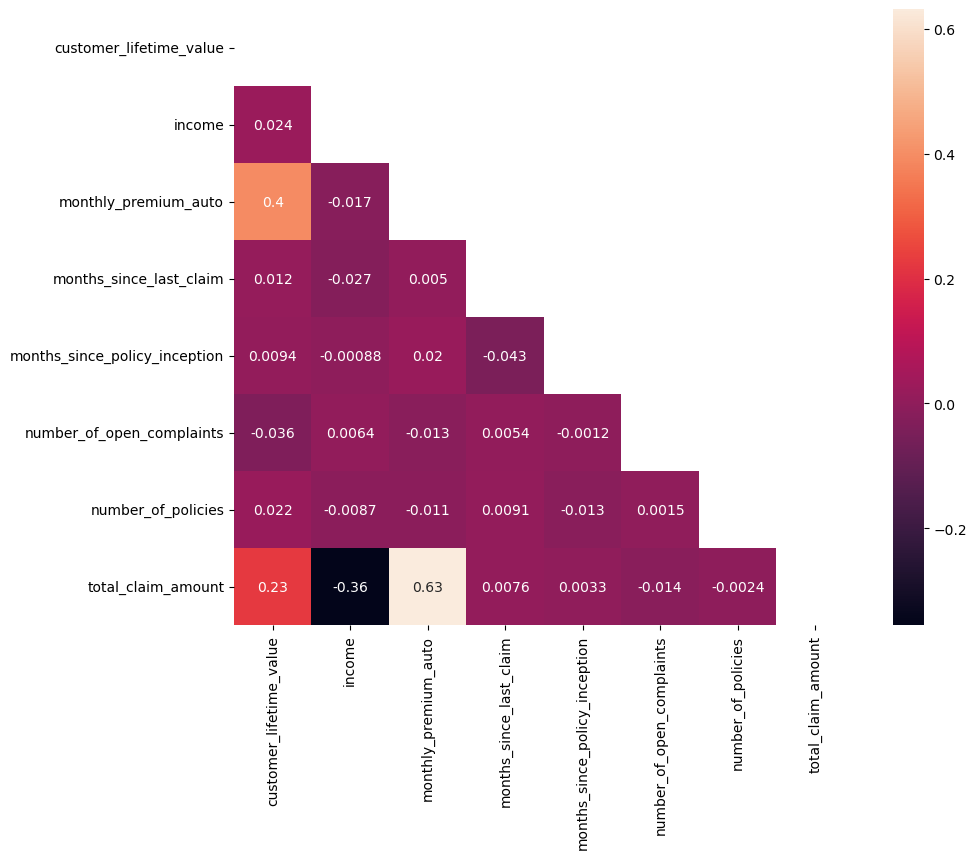

In [7]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True # to hiding repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)

In [8]:
num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [9]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)
X_num = num.drop(['total_claim_amount'], axis=1)
X_cat = cat

X_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [10]:
transformer = StandardScaler().fit(X_num)
X_stand = transformer.transform(X_num)

In [11]:
X_num_stand = pd.DataFrame(X_stand, columns=X_num.columns)
X_num_stand.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


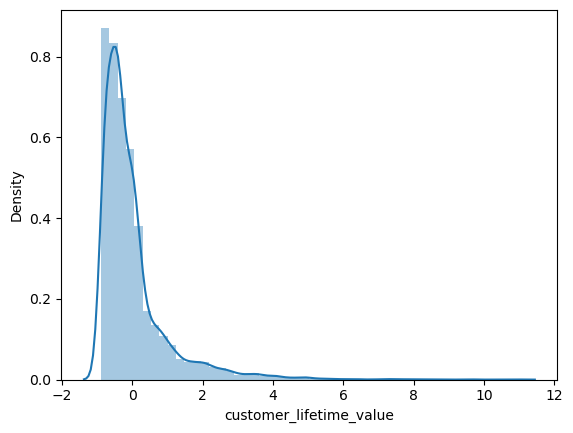

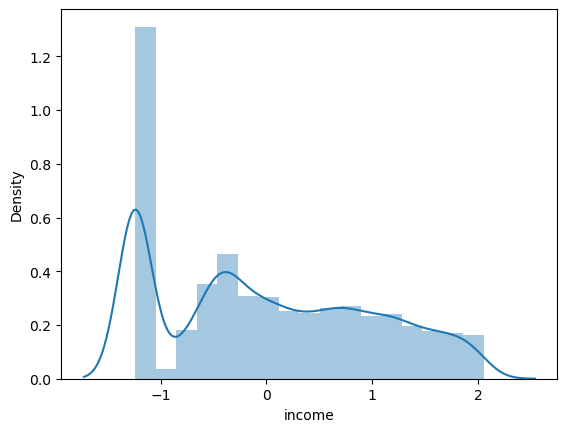

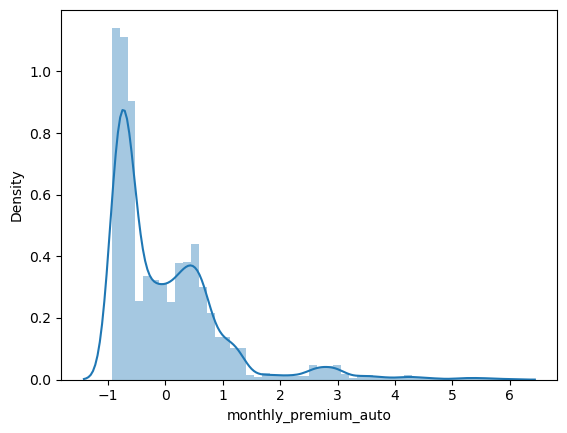

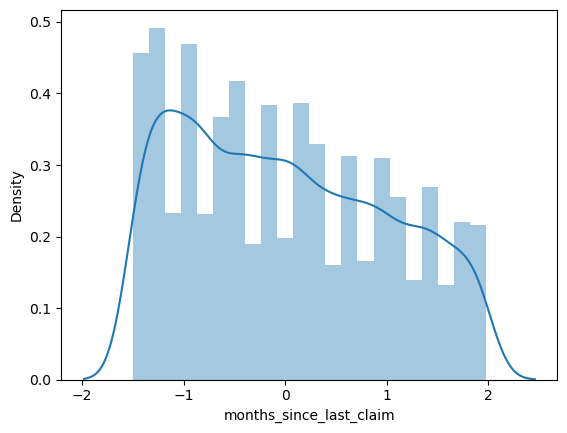

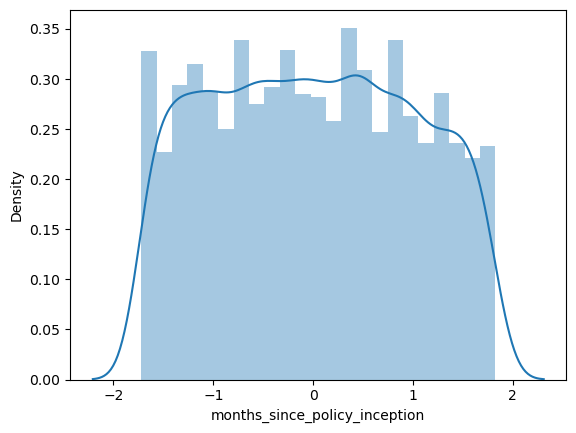

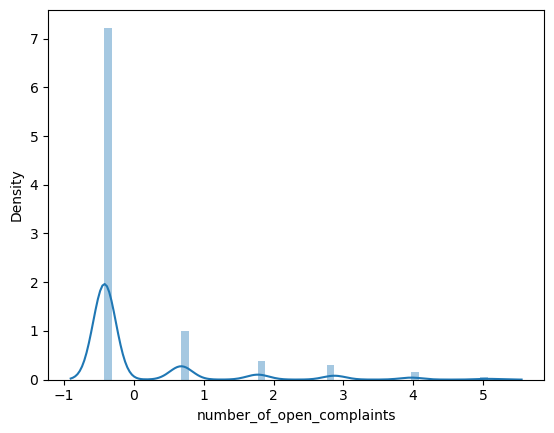

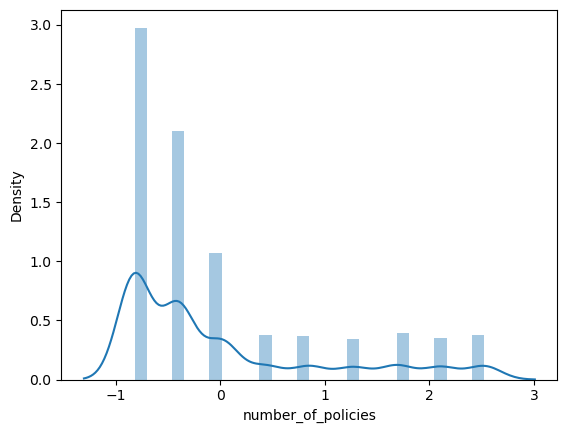

In [12]:
for column in X_num_stand.columns:
    sns.distplot(X_num_stand[column])
    plt.show()

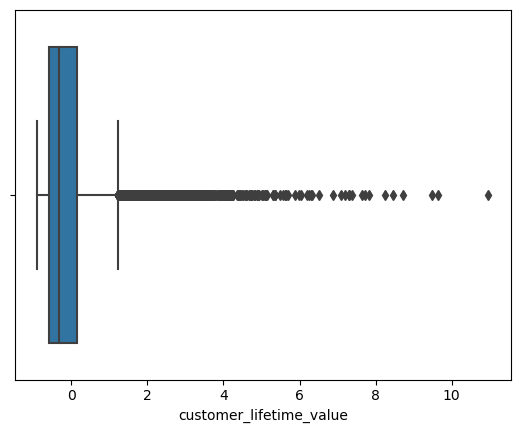

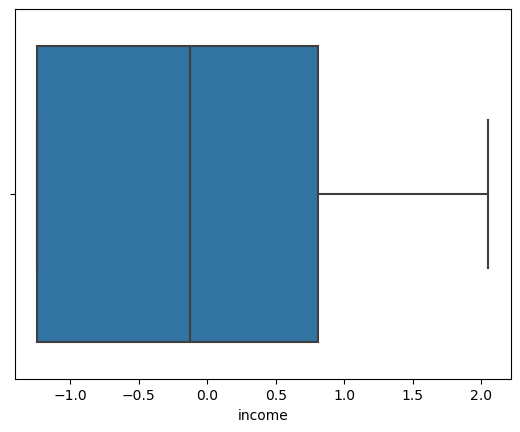

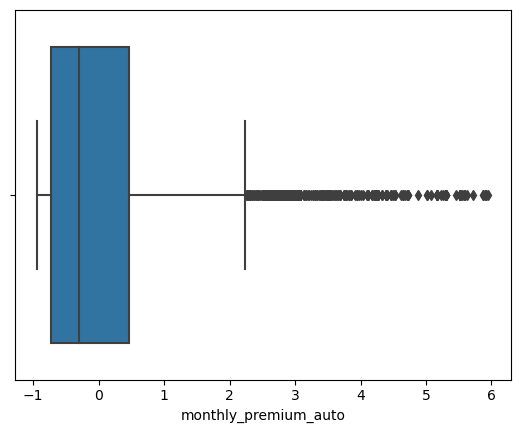

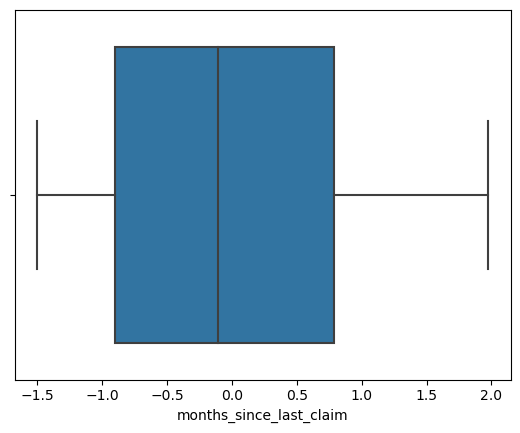

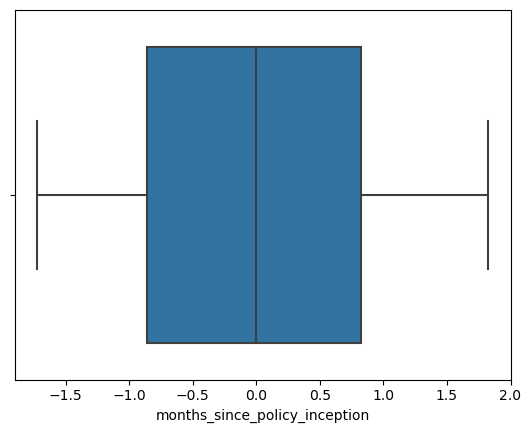

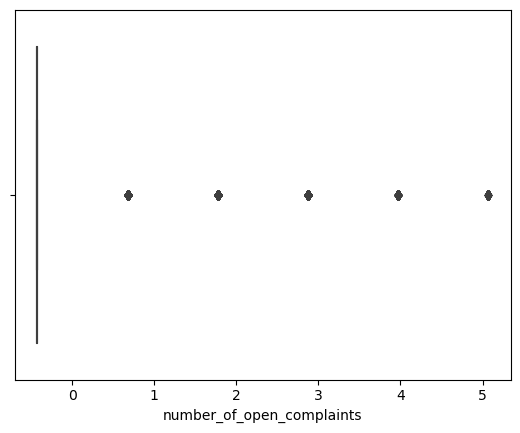

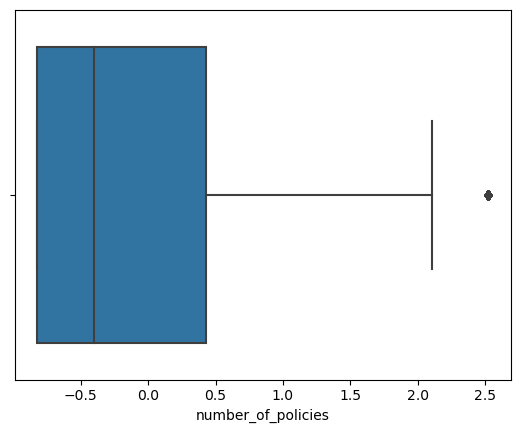

In [13]:
for column in X_num_stand.columns:
    sns.boxplot(x=X_num_stand[column] ,whis=1.5)
    plt.show()

#### to deal with: customer_lifetime_value, monthly_premium_auto, number_of_policies
#### to encode so that it appears as a type of boolean 0 or 1: number_of_open_complaints

<AxesSubplot:xlabel='customer_lifetime_value'>

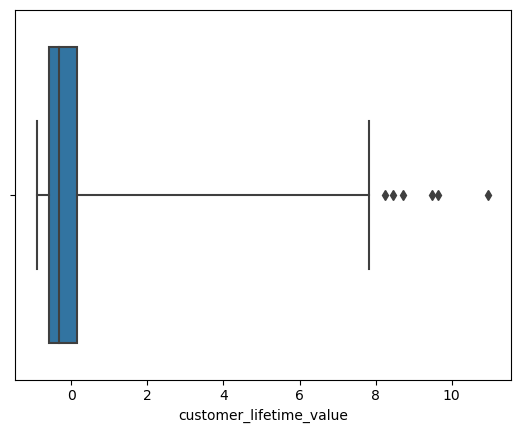

In [14]:
# removing outliers

sns.boxplot(x=X_num_stand['customer_lifetime_value'], whis=11)

In [15]:
# any removals will have to be reflected in the entirety of the set, not only in X_num_stand or X
# so I will apply my changes to the entire dataset after I find out what they should be, then redefine the subsets, in order to avoid errors due to incosistency in the data 

In [16]:

iqr1 = np.percentile(X_num_stand['customer_lifetime_value'],75) - np.percentile(X_num_stand['customer_lifetime_value'],25)
iqr1

0.7230695149256969

In [17]:
upper_limit1 = np.percentile(X_num_stand['customer_lifetime_value'],75) + 11*iqr1
lower_limit1 = np.percentile(X_num_stand['customer_lifetime_value'],25) - 11*iqr1
upper_limit1, lower_limit1

(8.093086958249515, -8.537511885041512)

In [18]:
X_num_stand = X_num_stand[(X_num_stand['customer_lifetime_value']>lower_limit1) & (X_num_stand['customer_lifetime_value']<upper_limit1)]
X_num_stand

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


<AxesSubplot:xlabel='monthly_premium_auto'>

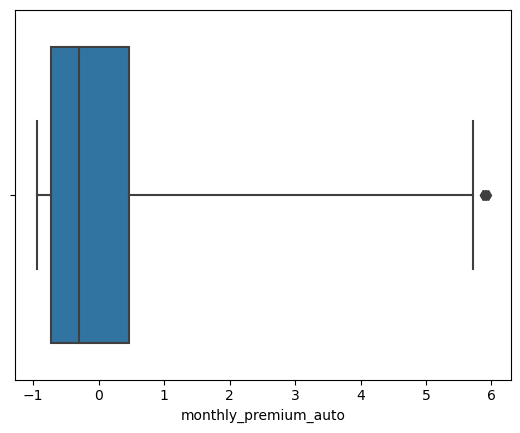

In [19]:
#monthly_premium_auto

sns.boxplot(x=X_num_stand['monthly_premium_auto'], whis=4.5)

In [20]:
iqr2 = np.percentile(X_num_stand['monthly_premium_auto'],75) - np.percentile(X_num_stand['monthly_premium_auto'],25)
iqr2

1.1916497159797104

In [21]:
upper_limit2 = np.percentile(X_num_stand['monthly_premium_auto'],75) + 4.5*iqr2
lower_limit2 = np.percentile(X_num_stand['monthly_premium_auto'],25) - 4.5*iqr2
upper_limit2, lower_limit2

(5.821084158954501, -6.095413000842603)

In [22]:
X_num_stand = X_num_stand[(X_num_stand['monthly_premium_auto']>lower_limit2) & (X_num_stand['monthly_premium_auto']<upper_limit2)]
X_num_stand

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154


<AxesSubplot:xlabel='number_of_policies'>

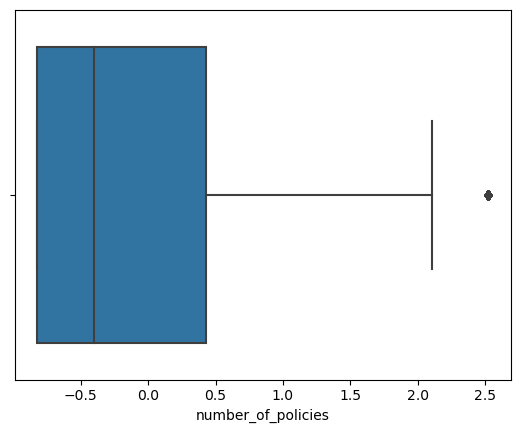

In [23]:
#number_of_policies

sns.boxplot(x=X_num_stand['number_of_policies'], whis=1.5)

In [24]:
iqr3 = np.percentile(X_num_stand['number_of_policies'],75) - np.percentile(X_num_stand['number_of_policies'],25)
iqr3

1.2552033585471871

In [25]:
upper_limit3 = np.percentile(X_num_stand['number_of_policies'],75) + 1.5*iqr3
lower_limit3 = np.percentile(X_num_stand['number_of_policies'],25) - 1.5*iqr3
upper_limit3, lower_limit3

(2.3153605197111933, -2.705452914477555)

In [26]:
#X_num_stand = X_num_stand[(X_num_stand['number_of_policies']>lower_limit) & (X_num_stand['number_of_policies']<upper_limit)]
#X_num_stand

*too many rows were removed, which means many outliers share the same of a very close value in the boxplot. I will change the whiskers of number of policy's and see if I need to remove any more rows again

<AxesSubplot:xlabel='number_of_policies'>

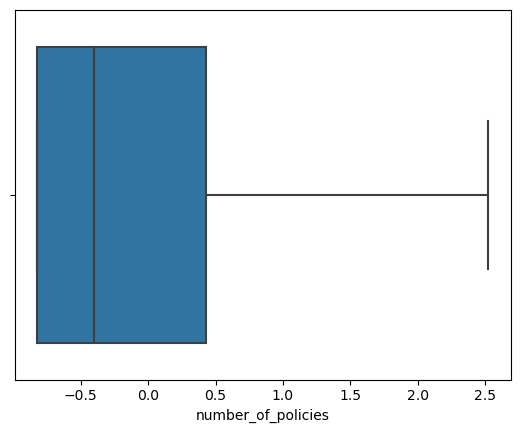

In [27]:
sns.boxplot(x=X_num_stand['number_of_policies'], whis=2)

I will check out how the number of open complaints' distribution would look like if I turned the variabled's values into 0 for non-existence of complaints or 1 for their existence

In [28]:
X_num['number_of_open_complaints'].unique()
X_num['number_of_open_complaints'] = X_num['number_of_open_complaints'].apply(lambda x: str(x))
X_num['number_of_open_complaints'] = (X_num['number_of_open_complaints'].str.replace('2', '1')
                                                        .replace('3', '1')
                                                        .replace('4', '1')
                                                        .replace('5', '1'))
X_num['number_of_open_complaints'] = X_num['number_of_open_complaints'].apply(lambda x: int(x))

<AxesSubplot:xlabel='number_of_open_complaints'>

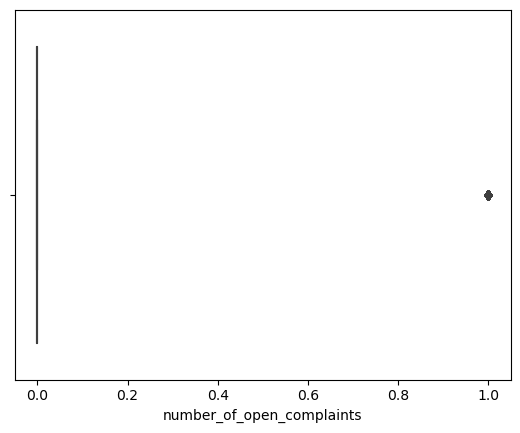

In [29]:
sns.boxplot(x=X_num['number_of_open_complaints'], whis=1.5)

### it seems that I could just drop the column altogether

In [30]:
X_num_stand = X_num_stand.drop(['number_of_open_complaints'], axis =1)


In [31]:
X_cat # effective_to_date column also has nothing for me to work with later on
X_cat = X_cat.drop(['effective_to_date'], axis=1)

In [32]:
iqr1 = np.percentile(X['customer_lifetime_value'],75) - np.percentile(X['customer_lifetime_value'],25)
iqr1

4967.915247000001

In [33]:
upper_limit1 = np.percentile(X['customer_lifetime_value'],75) + 11*iqr1
lower_limit1 = np.percentile(X['customer_lifetime_value'],25) - 11*iqr1
upper_limit1, lower_limit1

(63609.234758250015, -50652.815922750015)

In [34]:
X = X[(X['customer_lifetime_value']>lower_limit1) & (X['customer_lifetime_value']<upper_limit1)]
X

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [35]:
iqr2 = np.percentile(X['monthly_premium_auto'],75) - np.percentile(X['monthly_premium_auto'],25)
iqr2


41.0

In [36]:
upper_limit2 = np.percentile(X['monthly_premium_auto'],75) + 4.5*iqr2
lower_limit2 = np.percentile(X['monthly_premium_auto'],25) - 4.5*iqr2
upper_limit2, lower_limit2


(293.5, -116.5)

In [37]:
X = X[(X['monthly_premium_auto']>lower_limit2) & (X['monthly_premium_auto']<upper_limit2)]
X

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [38]:
data_new = data[(data['customer_lifetime_value']>lower_limit1) & (data['customer_lifetime_value']<upper_limit1)]
data_new = data_new[(data_new['monthly_premium_auto']>lower_limit2) & (data_new['monthly_premium_auto']<upper_limit2)]
data_new



,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [39]:
y = data_new["total_claim_amount"]
X = data_new.drop(['number_of_open_complaints','effective_to_date', ],axis=1)

X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=object)
X.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_last_claim,months_since_policy_inception,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,32,5,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,13,42,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,18,38,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,18,65,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,12,44,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [40]:
for column in X_cat.columns:
    print(column)
    print(X_cat[column].unique())

state
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response
['No' 'Yes']
coverage
['Basic' 'Extended' 'Premium']
education
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender
['F' 'M']
location_code
['Suburban' 'Rural' 'Urban']
marital_status
['Married' 'Single' 'Divorced']
policy_type
['Corporate Auto' 'Personal Auto' 'Special Auto']
policy
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type
['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel
['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size
['Medsize' 'Small' 'Large']


In [41]:
# Now that that is known, I will start encoding them
# state
# I will group the states as northwest = Washington, Oregon = nw and southwest = Arizona, California, Nevada = sw

X_cat['state'] = X_cat['state'].apply(lambda x: str(x))
X_cat['state'] = (X_cat['state'].str.replace('Washington', 'nw')
                                    .replace('Oregon', 'nw')
                                    .replace('Arizona', 'sw')
                                    .replace('California', 'sw')
                                    .replace('Nevada','sw'))


In [42]:
# response only has 2 unique values and will be thus easy to encode
# coverage has 3 values, thus I will follow the same method as Xisca
# education: I will group the values as above highschool = ah or highschool or below = hb

X_cat['education'] = X_cat['education'].apply(lambda x: str(x))
X_cat['education'] = (X_cat['education'].str.replace('Bachelor', 'ah')
                                            .replace('College', 'ah')
                                            .replace('Master', 'ah')
                                            .replace('Doctor', 'ah')
                                            .replace('High School or Below','bh'))

In [43]:
# employmentstatus: I will use labels in this case as I can not create a simpler system of reference

X_cat['employmentstatus'] = X_cat['employmentstatus'].apply(lambda x: str(x))
X_cat['employmentstatus'] = (X_cat['employmentstatus'].str.replace('Employed', '1')
                                                        .replace('Unemployed', '2')
                                                        .replace('Medical Leave', '3')
                                                        .replace('Disabled', '4')
                                                        .replace('Retired', '5'))
X_cat['employmentstatus'] = X_cat['employmentstatus'].apply(lambda x: int(x))

In [44]:
##policy: decrease number of columns to 3
# 1 = Corporate L1, Corporate L2, Corporate L3
# 2 = Personal L1, Personal L2, Personal L3
# 3 = Special L1, Special L2, Special L3
# , then like xisca

X_cat['policy'] = X_cat['policy'].apply(lambda x: str(x))
X_cat['policy'] = (X_cat['policy'].str.replace('Corporate L1', 'Corporate')
                                        .replace('Corporate L2', 'Corporate')
                                        .replace('Corporate L3', 'Corporate')
                                        .replace('Personal L1', 'Personal')
                                        .replace('Personal L2', 'Personal')
                                        .replace('Personal L3', 'Personal')
                                        .replace('Special L1', 'Special')
                                        .replace('Special L2', 'Special')
                                        .replace('Special L3', 'Special'))

In [45]:
#renew offer type: labels ['Offer1' 'Offer3' 'Offer2' 'Offer4']

X_cat['renew_offer_type'] = X_cat['renew_offer_type'].apply(lambda x: str(x))
X_cat['renew_offer_type'] = (X_cat['renew_offer_type'].str.replace('Offer1', '1')
                                                        .replace('Offer2', '2')
                                                        .replace('Offer3', '3')
                                                        .replace('Offer4', '4'))
X_cat['renew_offer_type'] = X_cat['renew_offer_type'].apply(lambda x: int(x))

In [46]:
#sales channel: labels

X_cat['sales_channel'] = X_cat['sales_channel'].apply(lambda x: str(x))
X_cat['sales_channel'] = (X_cat['sales_channel'].str.replace('Agent', '1')
                                                        .replace('Call Center', '2')
                                                        .replace('Web', '3')
                                                        .replace('Branch', '4'))
X_cat['sales_channel'] = X_cat['sales_channel'].apply(lambda x: int(x))

In [47]:
#vehicle class: labels

X_cat['vehicle_class'] = X_cat['vehicle_class'].apply(lambda x: str(x))                                                        
X_cat['vehicle_class'] = (X_cat['vehicle_class'].str.replace('Two-Door Car', '1')                                                        
                                                        .replace('Four-Door Car', '2')
                                                        .replace('SUV', '3')
                                                        .replace('Luxury SUV', '4')
                                                        .replace('Luxury Car', '4') #decrease number of columns
                                                        .replace('Sports Car', '5'))
X_cat['vehicle_class'] = X_cat['vehicle_class'].apply(lambda x: int(x))

In [48]:
Xnothot = X_cat[['employmentstatus', 'renew_offer_type', 'sales_channel', 'vehicle_class']] # new dataframe containing the label encoded variables
Xnothot = Xnothot.reset_index(drop=True)                                                    # resetting the index to match the one of the standardized variables
Xnothot = Xnothot.reset_index()                                                             # creating new column with the index's values, in order to use it later to merge on with the rest of the columns
Xnothot

,index,employmentstatus,renew_offer_type,sales_channel,vehicle_class
0,0,1,1,1,1
1,1,2,3,1,2
2,2,1,1,1,1
3,3,2,1,2,3
4,4,1,1,1,2
...,...,...,...,...,...
9117,9117,1,2,3,2
9118,9118,1,1,4,2
9119,9119,2,1,4,2
9120,9120,1,3,4,2


In [49]:
Xhot = X_cat[['state', 'response', 'coverage', 'education', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'vehicle_size']]
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(Xhot)

# state only has 2 unique values and will be thus easy to encode

{'nw': [1,0],
'sw': [0,0]}

# response

{'Yes': [1,0],
'No': [0,0]}

# coverage has 3 values, thus I will follow the same method as shown in class

{'Basic': [1,0],
'Extended': [0,0],
'Premium': [0,1]}

# education

{'ah': [1,0],
'hb': [0,0]}

# gender

{'M': [1,0],
'F': [0,0]}

# location

{'Suburban': [1,0],
'Rural': [0,0],
'Urban': [0,1]}

# marital_status

{'Married': [1,0],
'Single': [0,0],
'Divorced': [0,1]}

# policy_type

{'Corporate Auto': [1,0],
'Personal Auto': [0,0],
'Special Auto': [0,1]}

# policy

{'Corporate': [1,0],
'Personal': [0,0],
'Special': [0,1]}

#vehicle size

{'Medsize': [1,0],
'Small': [0,0],
'Large': [0,1]}

encoded = encoder.transform(Xhot).toarray() 
cat_enc1 = pd.DataFrame(encoded)
cat_enc1.columns = ['state_nw', 'response_yes','cov_basic', 'cov_premium', 'edu_ab_high', 'gender_m', 'suburban', 'urban', 'married', 'divorced', 'corporate_auto', 'special_auto', 'policy_corp', 'policy_special', 'veh_size_medsize', 'veh_size_large']

cat_enc1   # one hot encoded dataframe

,state_nw,response_yes,cov_basic,cov_premium,edu_ab_high,gender_m,suburban,urban,married,divorced,corporate_auto,special_auto,policy_corp,policy_special,veh_size_medsize,veh_size_large
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9118,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9119,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9120,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [50]:
# same as above with Xnothot

cat_enc1 = cat_enc1.drop(['corporate_auto', 'special_auto'], axis=1) # redundant columns as they have the same values as policy_corp and policy_special
cat_enc1 = cat_enc1.reset_index()
cat_enc1

,index,state_nw,response_yes,cov_basic,cov_premium,edu_ab_high,gender_m,suburban,urban,married,divorced,policy_corp,policy_special,veh_size_medsize,veh_size_large
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,9117,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9118,9118,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9119,9119,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9120,9120,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


#### I am going to first merge the datasets and then train the model and run predictions

In [51]:
X_num_stand

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.822648
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.106160
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.404247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,1.687759
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.822648
...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.404247
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.822648
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,-0.404247
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,0.014154


In [52]:
# same as above with Xnothot and cat_enc1

X_num_stand = X_num_stand.reset_index(drop=True)
X_num_stand = X_num_stand.reset_index()
X_num_stand

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.822648
1,1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.106160
2,2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.404247
3,3,-0.052263,-1.239617,0.371467,0.288205,0.606907,1.687759
4,4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.822648
...,...,...,...,...,...,...,...
9117,9117,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.404247
9118,9118,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.822648
9119,9119,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,-0.404247
9120,9120,-0.069935,-0.517356,0.080820,1.876656,-1.614960,0.014154


In [53]:
cat_enc2 = pd.merge(Xnothot, cat_enc1, on = "index")
cat_enc2

,index,employmentstatus,renew_offer_type,sales_channel,vehicle_class,state_nw,response_yes,cov_basic,cov_premium,edu_ab_high,gender_m,suburban,urban,married,divorced,policy_corp,policy_special,veh_size_medsize,veh_size_large
0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,2,3,1,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2,1,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3,2,1,2,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,1,1,1,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,9117,1,2,3,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9118,9118,1,1,4,2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9119,9119,2,1,4,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9120,9120,1,3,4,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Now I will merge all of my model-training columns into a redefined X dataframe

In [54]:
X = pd.merge(X_num_stand, cat_enc2, on = 'index')
X

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,employmentstatus,renew_offer_type,sales_channel,...,edu_ab_high,gender_m,suburban,urban,married,divorced,policy_corp,policy_special,veh_size_medsize,veh_size_large
0,0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.822648,1,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.106160,2,3,1,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.404247,1,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3,-0.052263,-1.239617,0.371467,0.288205,0.606907,1.687759,2,1,2,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.822648,1,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,9117,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.404247,1,2,3,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9118,9118,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.822648,1,1,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9119,9119,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,-0.404247,2,1,4,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9120,9120,-0.069935,-0.517356,0.080820,1.876656,-1.614960,0.014154,1,3,4,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [55]:
X = X.drop('index', axis=1) # removing the index column as it is no longer needed

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=50) # running the following tests multiple times, I found that 0.21 is a test size that increases r^2 and decreases RMSE and MAE

In [57]:
len(X_train) # checking that the sampled values are of the same number for y and X

7206

In [58]:
len(y_train)

7206

In [59]:
len(X_test)

1916

In [60]:
len(y_test)

1916

##### Finally feeding the mashine with the trained data

In [61]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

##### And running my predictions

In [62]:
predictions = model.predict(X_test)
predictions

array([ 401.73388735,  299.17933627,  518.78772861, ..., 1540.41922856,
        215.89695058,  -55.6568564 ])

In [63]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", round(r2, 2))
print("RMSE = ", round(RMSE, 2))
print("MSE = ", round(MSE, 2))
print("MAE = ", round(MAE, 2))

R2 =  0.78
RMSE =  133.36
MSE =  17783.78
MAE =  94.73


In [64]:
max(y_test)

2092.523421

In [65]:
min(y_test)

0.42331

#### Let's take a look and check for incosistensies in my predictions by creating a table containing actual and predicted values and their difference

In [66]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = predictions
results['difference'] = results.apply(lambda x: abs(x['actual'] - x['predicted']), axis=1)
results = round(results, 2)
results

,actual,predicted,difference
5242,292.80,401.73,108.93
7908,176.24,299.18,122.94
3856,655.79,518.79,137.00
994,302.76,410.99,108.22
3292,499.20,628.30,129.10
...,...,...,...
1604,1227.46,868.74,358.71
3717,460.80,489.79,28.99
5833,1358.40,1540.42,182.02
667,262.12,215.90,46.23


In [67]:
results.sort_values('difference', ascending=True).head(50)

,actual,predicted,difference
6360,568.80,568.82,0.02
6,321.60,321.70,0.10
5400,28.32,28.13,0.18
6284,436.80,436.54,0.26
801,251.33,250.87,0.46
1856,460.08,460.61,0.52
1602,11.45,12.01,0.56
879,217.97,218.57,0.60
461,619.17,618.34,0.82
8223,256.92,257.81,0.89


In [68]:
results.sort_values('difference', ascending=False).head(50)

,actual,predicted,difference
7978,2069.31,975.30,1094.01
8684,2092.52,1178.39,914.13
6290,1516.38,826.28,690.10
8851,1724.23,1075.26,648.97
3923,35.77,674.29,638.52
3685,1443.46,830.54,612.91
2035,1101.05,503.51,597.55
1011,540.14,1126.76,586.62
6177,2052.00,1476.08,575.92
6039,1084.96,509.68,575.28


#### It seems that as the values of my predictions increase, so does the number and magnitude of incosistencies

<AxesSubplot:xlabel='actual', ylabel='predicted'>

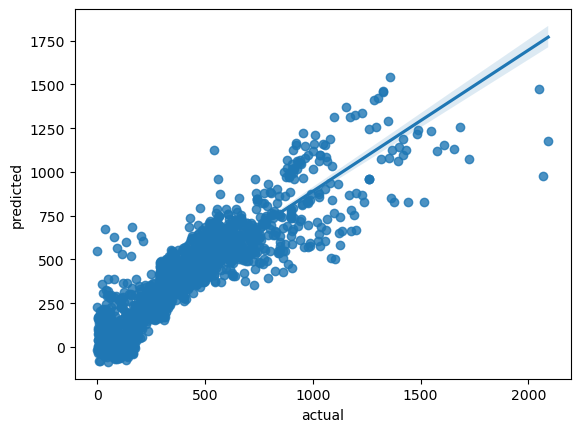

In [69]:
sns.regplot(results['actual'], results['predicted'])

#### The plot above only partially confirms my assumption about the rate of incosistencies as the values increase. There seem to be some outliers as the values increase, but the same is true for clusters of smaller values.

#### I will try to find out what happens if I consider more outliers.
#### Before that, I will merge my X and y frames, so that any row removals will take place for both of them

In [70]:
y = y.reset_index(drop=True)
y = y.reset_index()  # again, I'm going to use the column index to merge
y

,index,total_claim_amount
0,0,384.811147
1,1,1131.464935
2,2,566.472247
3,3,529.881344
4,4,138.130879
...,...,...
9117,9117,198.234764
9118,9118,379.200000
9119,9119,790.784983
9120,9120,691.200000


In [71]:
X = X.reset_index()
X

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,employmentstatus,renew_offer_type,sales_channel,...,edu_ab_high,gender_m,suburban,urban,married,divorced,policy_corp,policy_special,veh_size_medsize,veh_size_large
0,0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.822648,1,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.106160,2,3,1,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.404247,1,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3,-0.052263,-1.239617,0.371467,0.288205,0.606907,1.687759,2,1,2,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.822648,1,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,9117,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.404247,1,2,3,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9118,9118,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.822648,1,1,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9119,9119,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,-0.404247,2,1,4,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9120,9120,-0.069935,-0.517356,0.080820,1.876656,-1.614960,0.014154,1,3,4,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [72]:
data2 = pd.merge(X, y, on='index')
data2 = data2.drop('index', axis = 1)
data2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,employmentstatus,renew_offer_type,sales_channel,vehicle_class,...,gender_m,suburban,urban,married,divorced,policy_corp,policy_special,veh_size_medsize,veh_size_large,total_claim_amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.822648,1,1,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,384.811147
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.106160,2,3,1,2,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1131.464935
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.404247,1,1,1,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,566.472247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,1.687759,2,1,2,3,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,529.881344
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.822648,1,1,1,2,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.404247,1,2,3,2,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,198.234764
9118,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.822648,1,1,4,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,379.200000
9119,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,-0.404247,2,1,4,2,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,790.784983
9120,-0.069935,-0.517356,0.080820,1.876656,-1.614960,0.014154,1,3,4,2,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,691.200000


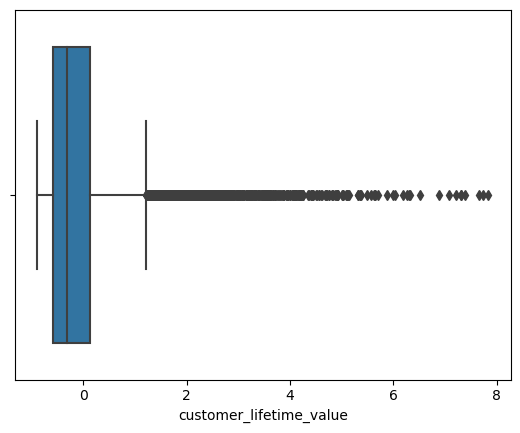

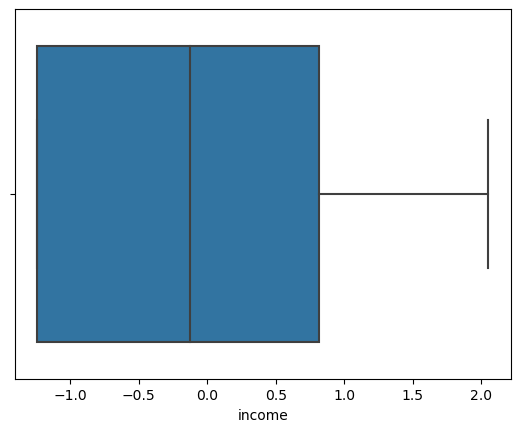

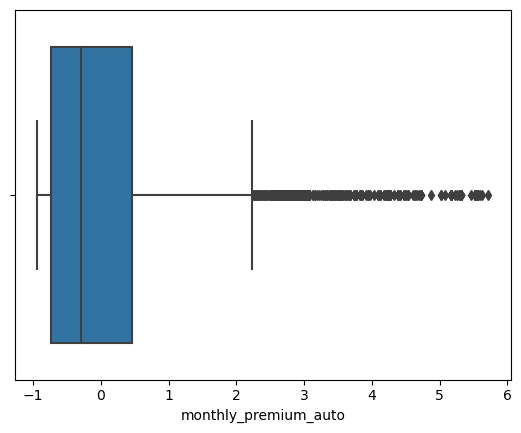

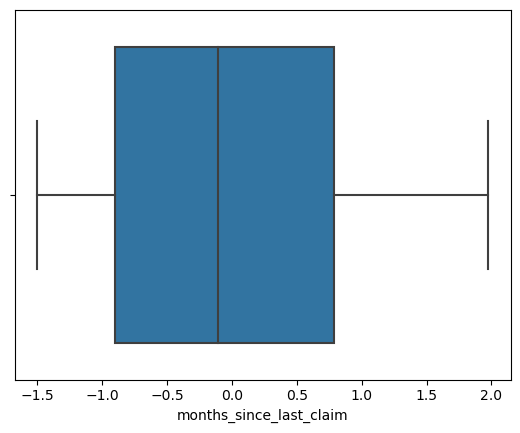

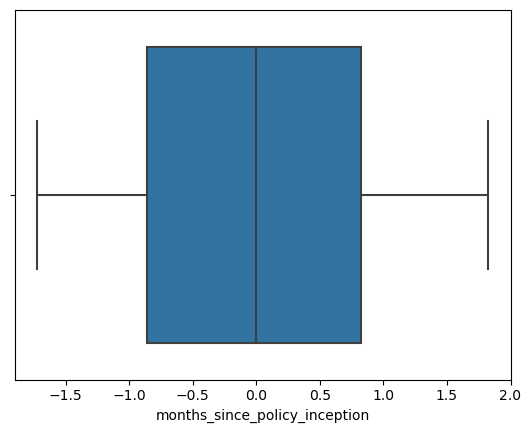

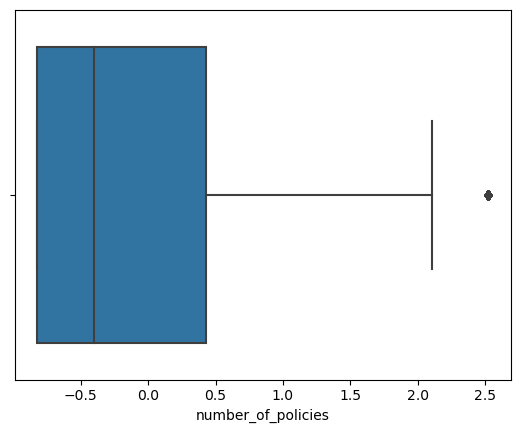

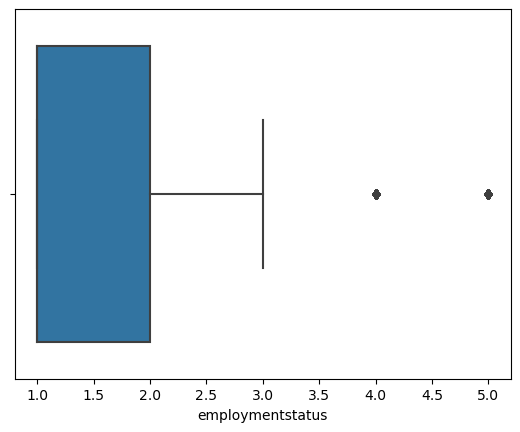

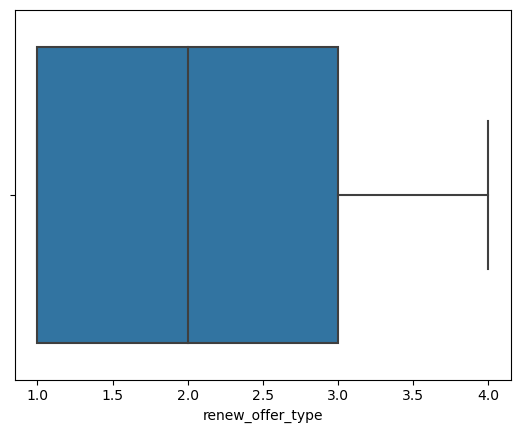

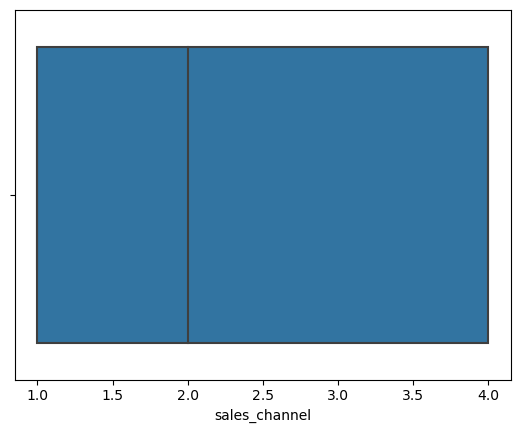

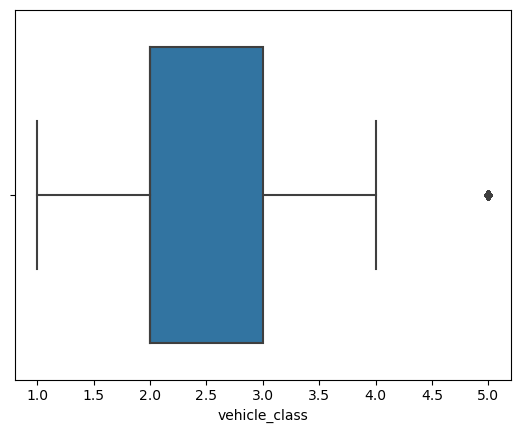

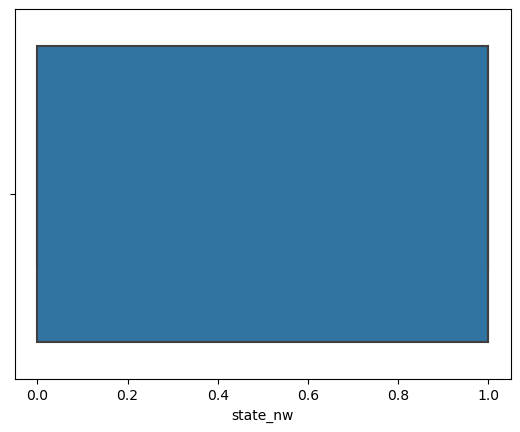

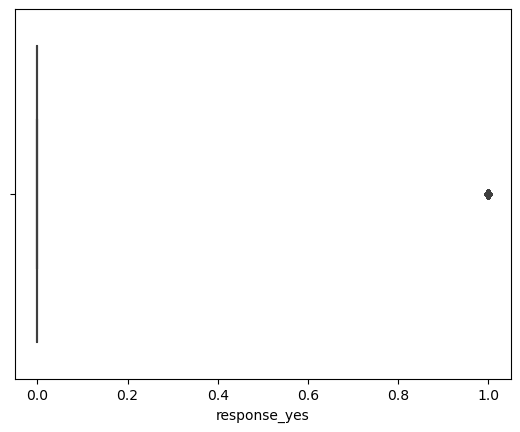

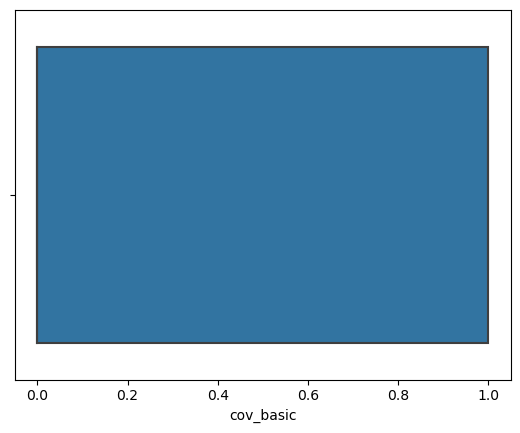

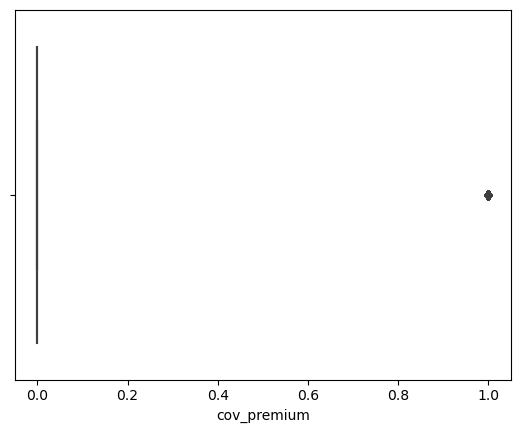

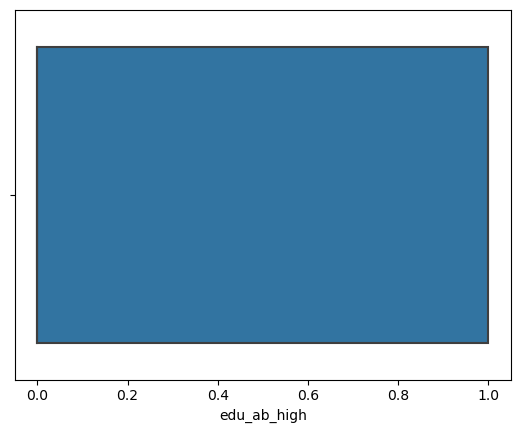

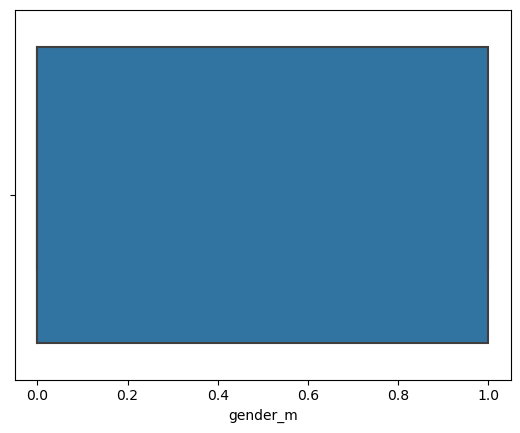

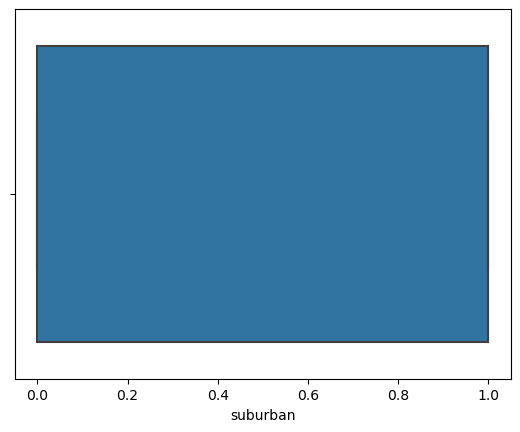

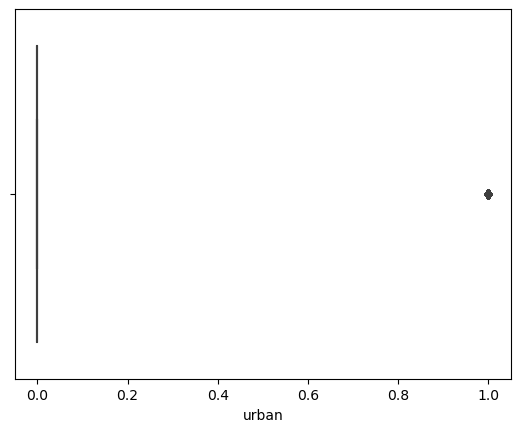

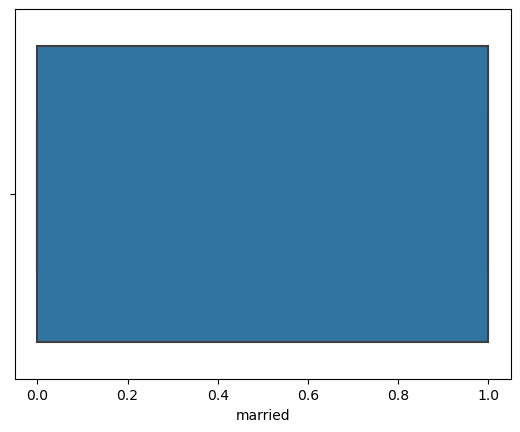

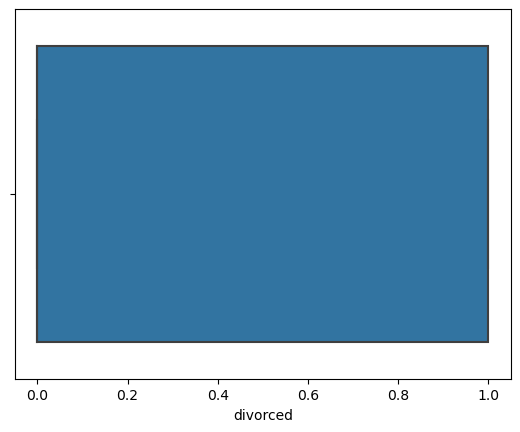

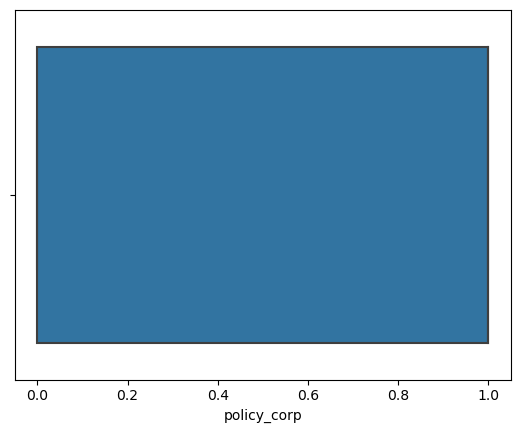

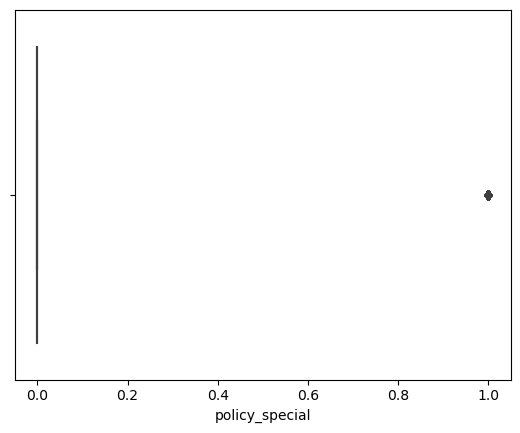

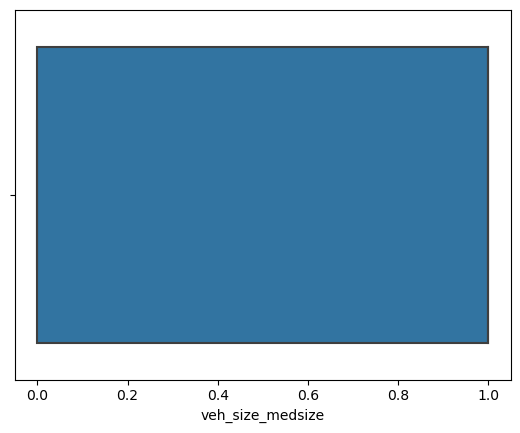

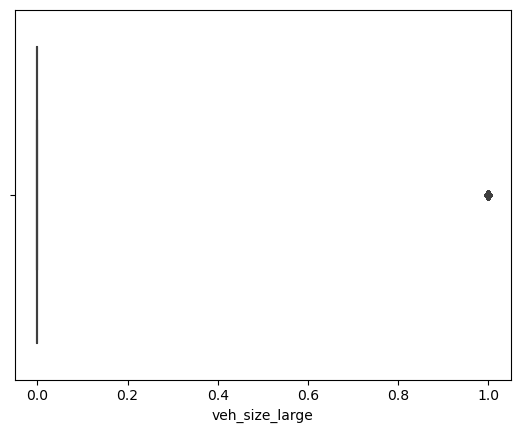

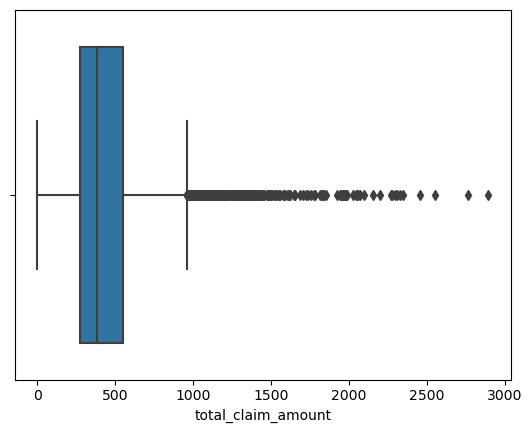

In [73]:
for column in data2.columns:
    sns.boxplot(x=data2[column] ,whis=1.5)
    plt.show()

<AxesSubplot:xlabel='customer_lifetime_value'>

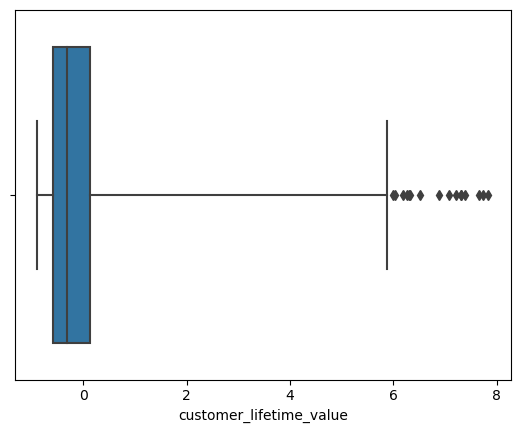

In [74]:
sns.boxplot(x=data2['customer_lifetime_value'] ,whis=8)

In [75]:

iqr1 = np.percentile(data2['customer_lifetime_value'],75) - np.percentile(data2['customer_lifetime_value'],25)
iqr1

0.7201886967582399

In [76]:
upper_limit1 = np.percentile(data2['customer_lifetime_value'],75) + 8*iqr1
lower_limit1 = np.percentile(data2['customer_lifetime_value'],25) - 8*iqr1
upper_limit1, lower_limit1

(5.896909010495597, -6.3462988343944815)

In [77]:
data2 = data2[(data2['customer_lifetime_value']>lower_limit1) & (data2['customer_lifetime_value']<upper_limit1)]
data2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,employmentstatus,renew_offer_type,sales_channel,vehicle_class,...,gender_m,suburban,urban,married,divorced,policy_corp,policy_special,veh_size_medsize,veh_size_large,total_claim_amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.822648,1,1,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,384.811147
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.106160,2,3,1,2,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1131.464935
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.404247,1,1,1,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,566.472247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,1.687759,2,1,2,3,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,529.881344
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.822648,1,1,1,2,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.404247,1,2,3,2,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,198.234764
9118,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.822648,1,1,4,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,379.200000
9119,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,-0.404247,2,1,4,2,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,790.784983
9120,-0.069935,-0.517356,0.080820,1.876656,-1.614960,0.014154,1,3,4,2,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,691.200000


<AxesSubplot:xlabel='monthly_premium_auto'>

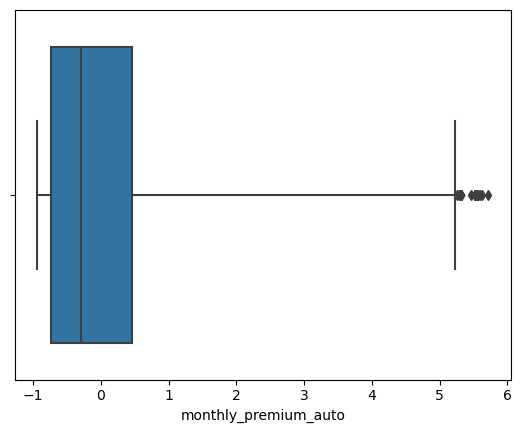

In [78]:
sns.boxplot(x=data2['monthly_premium_auto'] ,whis=4)

In [79]:
iqr2 = np.percentile(data2['monthly_premium_auto'],75) - np.percentile(data2['monthly_premium_auto'],25)
iqr2

1.1916497159797104

In [80]:
upper_limit2 = np.percentile(data2['monthly_premium_auto'],75) + 4*iqr2
lower_limit2 = np.percentile(data2['monthly_premium_auto'],25) - 4*iqr2
upper_limit2, lower_limit2

(5.2252593009646455, -5.4995881428527476)

In [81]:
data2 = data2[(data2['monthly_premium_auto']>lower_limit2) & (data2['monthly_premium_auto']<upper_limit2)]
data2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,employmentstatus,renew_offer_type,sales_channel,vehicle_class,...,gender_m,suburban,urban,married,divorced,policy_corp,policy_special,veh_size_medsize,veh_size_large,total_claim_amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.822648,1,1,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,384.811147
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.106160,2,3,1,2,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1131.464935
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.404247,1,1,1,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,566.472247
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,1.687759,2,1,2,3,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,529.881344
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.822648,1,1,1,2,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.404247,1,2,3,2,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,198.234764
9118,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.822648,1,1,4,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,379.200000
9119,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,-0.404247,2,1,4,2,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,790.784983
9120,-0.069935,-0.517356,0.080820,1.876656,-1.614960,0.014154,1,3,4,2,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,691.200000


In [82]:
X = data2.drop('total_claim_amount', axis = 1)
y = data2['total_claim_amount']

#### And now I will repeat the X Train and run predictions again

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=50)

In [380]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

7176
7176
1908
1908


In [381]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [382]:
predictions = model.predict(X_test)
predictions

array([338.40243801, 494.05309793,  40.69540633, ..., 409.73478013,
       208.34951883, 175.75760023])

In [383]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", round(r2, 2))
print("RMSE = ", round(RMSE, 2))
print("MSE = ", round(MSE, 2))
print("MAE = ", round(MAE, 2))

R2 =  0.76
RMSE =  135.71
MSE =  18418.54
MAE =  96.04


In [384]:
max(y_test)

2552.343856

In [385]:
min(y_test)

0.517753

In [386]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = predictions
results['difference'] = results.apply(lambda x: abs(x['actual'] - x['predicted']), axis=1)
results = round(results, 2)
results

,actual,predicted,difference
1194,316.80,338.40,21.60
8098,460.80,494.05,33.25
8014,146.30,40.70,105.61
6044,500.64,470.73,29.91
8559,1260.46,742.01,518.45
...,...,...,...
3678,549.27,528.19,21.08
1449,84.49,5.18,79.31
8337,355.20,409.73,54.53
5245,236.91,208.35,28.56


<AxesSubplot:xlabel='actual', ylabel='predicted'>

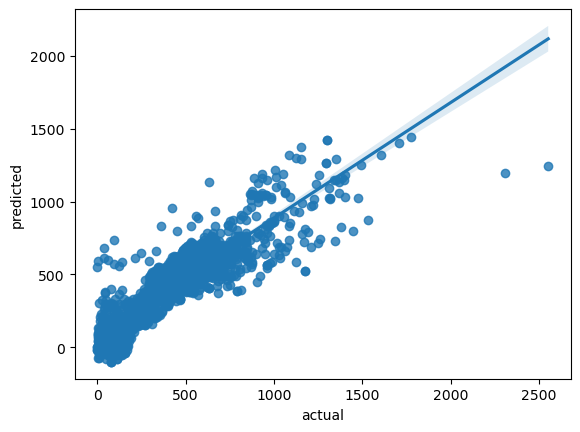

In [387]:
sns.regplot(results['actual'], results['predicted'])

In [388]:
results.sort_values('difference', ascending=True).head(50)

,actual,predicted,difference
7170,186.39,186.42,0.03
3265,590.40,589.99,0.41
3224,10.39,9.98,0.42
2269,42.69,42.22,0.47
7549,530.67,531.28,0.61
8290,258.04,258.70,0.66
2142,25.34,24.58,0.75
1442,524.84,525.81,0.97
3006,576.00,575.02,0.98
1856,1065.05,1064.00,1.05


In [389]:
results.sort_values('difference', ascending=False).head(50)

,actual,predicted,difference
4926,2552.34,1245.50,1306.84
7241,2306.51,1195.53,1110.97
8243,1532.08,870.30,661.78
1383,1448.99,796.99,652.00
7370,1176.28,524.67,651.61
5073,1176.28,524.85,651.43
3919,35.77,680.42,644.65
2691,95.69,737.04,641.35
4832,1343.62,728.91,614.71
3877,1.59,593.22,591.64


<AxesSubplot:xlabel='actual', ylabel='predicted'>

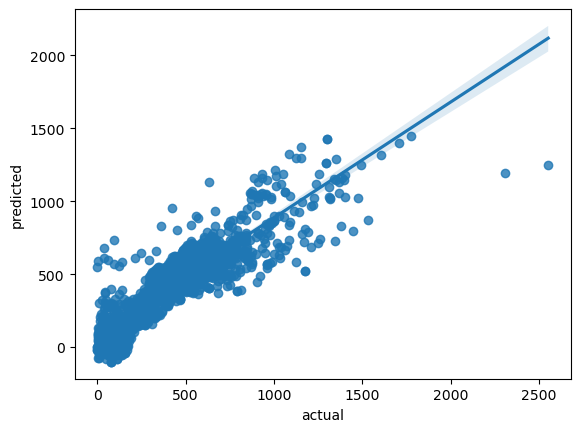

In [390]:
sns.regplot(results['actual'], results['predicted'])

### Although the r^2, RMSE and MAE of my compared data has not changed drastically after the removal of extra outliers, a smaller number of values appears to be far from the central curve. Further removal of outliers seems to affect this balance for the bad.
### Nevertheless, the model is still better to predict smaller values than higher ones.
### An attempt to consider more outliers for total_claim_amount has not really helped and was thus dropped.